<a href="https://colab.research.google.com/github/juhee3199/Machine-learning_advanced-study/blob/master/2-9%20%ED%85%8D%EC%8A%A4%ED%8A%B8%EB%B6%84%EC%84%9D3_%EB%B3%B5%EC%8A%B5/%202-9%20%ED%85%8D%EC%8A%A4%ED%8A%B8%EB%B6%84%EC%84%9D3_%EB%B3%B5%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 문제 1
## 영화 데이터셋으로 비슷한 영화 찾기
### 1) tmdb_5000_movies.csv 파일 불러오기
- 'id','title', 'genres', 'vote_average', 'vote_count', 'popularity', 'keywords', 'overview' 열을 남겨서 movies_df로 저장한다

In [ ]:
import pandas as pd

movies_df = pd.read_csv('tmdb_5000_movies.csv')
movies_df.head()

row_list=['id','title', 'genres', 'vote_average', 'vote_count', 'popularity', 'keywords', 'overview' ]
movies_df=movies_df[row_list]
movies_df.head()

,id,title,genres,vote_average,vote_count,popularity,keywords,overview
0,19995,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",7.2,11800,150.437577,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",6.9,4500,139.082615,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",6.3,4466,107.376788,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",7.6,9106,112.312950,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Following the death of District Attorney Harve...
4,49529,John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",6.1,2124,43.926995,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","John Carter is a war-weary, former military ca..."


### 2) literal_eval을 통해 type을 변환해준다

In [ ]:
from ast import literal_eval

movies_df['genres'] = movies_df['genres'].apply(literal_eval)
movies_df['keywords'] = movies_df['keywords'].apply(literal_eval)
movies_df.head()

,id,title,genres,vote_average,vote_count,popularity,keywords,overview
0,19995,Avatar,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",7.2,11800,150.437577,"[{'id': 1463, 'name': 'culture clash'}, {'id':...","In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",6.9,4500,139.082615,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...","Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",6.3,4466,107.376788,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",7.6,9106,112.312950,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",Following the death of District Attorney Harve...
4,49529,John Carter,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",6.1,2124,43.926995,"[{'id': 818, 'name': 'based on novel'}, {'id':...","John Carter is a war-weary, former military ca..."


### 3) genre와 keywords에서 'name'들만 뽑아 다시 저장해준다

In [ ]:
movies_df['genres'] = movies_df['genres'].apply(lambda x : [ y['name'] for y in x])
movies_df['keywords'] = movies_df['keywords'].apply(lambda x : [ y['name'] for y in x])
movies_df[['genres', 'keywords']].head()

,genres,keywords
0,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon..."
1,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ..."
2,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi..."
3,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i..."
4,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel..."


### 4) 장르에 대해 CountVectorizer를 적용한다
- fit_transform을 이용하여 genre_mat로 저장해준다

In [ ]:
movies_df['genres'] = movies_df['genres'].apply(lambda x : " ".join(x))
movies_df['genres'] .head()

0    Action Adventure Fantasy Science Fiction
1                    Adventure Fantasy Action
2                      Action Adventure Crime
3                 Action Crime Drama Thriller
4            Action Adventure Science Fiction
Name: genres, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cnt_vec=CountVectorizer()
genre_mat=cnt_vec.fit_transform(movies_df['genres'])
genre_mat

<4803x22 sparse matrix of type '<class 'numpy.int64'>'
	with 12703 stored elements in Compressed Sparse Row format>

In [ ]:
print(genre_mat.shape)

(4803, 22)


### 5) genre_mat을 이용하여 서로 문서 간의 코사인 유사도를 계산해준다
- 계산 후 유사도가 높은 순서대로 정렬을 해준 index를 genre_sim_sorted_ind로 저장한다

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

genre_sim = cosine_similarity(genre_mat, genre_mat)
genre_sim

array([[1.        , 0.77459667, 0.51639778, ..., 0.        , 0.        ,
        0.        ],
       [0.77459667, 1.        , 0.66666667, ..., 0.        , 0.        ,
        0.        ],
       [0.51639778, 0.66666667, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
genre_sim_sorted_ind = similarity_pair.argsort()[:,::-1] # 내림차순으로 정렬된 array의 인덱스를 반환
genre_sim_sorted_ind

array([[   0, 3494,   46, ..., 3038, 3037, 2401],
       [  19,  315,   38, ..., 3069, 3067, 2401],
       [1740,    2, 1542, ..., 3000, 2999, 2401],
       ...,
       [4800, 3809, 3285, ..., 2229, 2230,    0],
       [4802, 1594, 1596, ..., 3204, 3205,    0],
       [4802, 4710, 4521, ..., 3140, 3141,    0]])

In [ ]:
print(genre_sim.shape)
print(genre_sim_sorted_ind.shape)

(4803, 4803)
(4803, 4803)


### 6)유사도가 높은 영화를 찾는 함수 find_sim_movie 함수를 정의한다
- def find_sim_movie(df, sorted_ind, title_name, top_n=10)
- df: 영화 데이터프레임
- sorted_ind: 유사도를 높은 순서대로 정렬해준 index
- title_name: 기준이 되는 영화 이름
- top_n: 확인할 유사 영화의 개수

In [ ]:
def find_sim_movie(df, sorted_ind, title_name, top_n=10):
  ind = df['title']==title_name

In [ ]:
ind=movies_df[movies_df['title']=='Captain America: Civil War'].index
comparison_title=movies_df.iloc[ind[0]]['title']
comparison_title


'Captain America: Civil War'

In [ ]:
sim_df_indexes = genre_sim_sorted_ind[ind][:,:10].reshape(-1)
sim_df_indexes



array([ 183, 2912,  495,  507,   31,  508, 1079,   35,  511, 2372])

In [ ]:
sim_df=pd.DataFrame()
sim_df['title']=movies_df.iloc[sim_df_indexes]['title']
sim_df
#hotel_1_sim_df['similarity']=hotel_1_sim_value

,title
183,The Hunger Games: Catching Fire
2912,Star Wars
495,Journey 2: The Mysterious Island
507,Independence Day
31,Iron Man 3
508,The Lost World: Jurassic Park
1079,Dune
35,Transformers: Revenge of the Fallen
511,X-Men
2372,Megaforce


#### 캡틴아메리카 시빌워와 비슷한 영화 10개를 뽑아보자
- 'Captain America: Civil War'
- 'title', 'vote_average'만 뽑아준다

In [ ]:
similar_movies = find_sim_movie(movies_df, genre_sim_sorted_ind, 'Captain America: Civil War',10)
similar_movies[['title', 'vote_average']]

,title,vote_average
39,TRON: Legacy,6.3
2912,Star Wars,8.1
233,Star Wars: Episode I - The Phantom Menace,6.3
2372,Megaforce,3.5
1990,The Empire Strikes Back,8.2
400,Divergent,6.9
79,Iron Man 2,6.6
183,The Hunger Games: Catching Fire,7.4
230,Star Wars: Episode II - Attack of the Clones,6.4
1490,Return of the Jedi,7.9


# 문제 2
## 뉴스 데이터로 워드클라우드 제작
### 워드클라우드란 문서의 키워드, 개념 등을 직관적으로 파악할 수 있도록 핵심 단어를 시각적으로 돋보이게 하는 기법
### 1) naver_news_lecture.csv 파일을 불러온다
- press가 MBC에 해당하는 행만 뽑는다
- 'press','category','title','contents','date' 열만 남긴다

In [ ]:
news_df=pd.read_csv('naver_news_lecture.csv',  encoding='CP949')

news_df=news_df[news_df['press']=='MBC']

row_list=['press','category','title','contents','date']
news_df=news_df[row_list]
news_df.head()

,press,category,title,contents,date
4041,MBC,속보,"백악관, 트럼프 친서 확인…""북미정상 연락 계속 진행돼와""",미국 백악관이 도덜드 트럼프 대통령이 김정은 북한 국무위원장에게 친서를 보낸 사실을...,20190624
4042,MBC,속보,"""차드서 보코하람 기습 공격에 군인 등 8명 사망""",중부 아프리카 차드에서 나이지리아 이슬람 무장단체 보코하람이 기습 공격을 펼쳐 군인...,20190624
4043,MBC,속보,인도 종교행사장 대형텐트 붕괴로 최소 14명 사망,"인도 종교행사장에서 대형텐트가 무너져, 최소 14명이 숨지는 사고가 발생했습니다.\...",20190624
4044,MBC,속보,"이란 외무 ""5월 26일에도 美 무인기 영공 침범""","이란이 이달 20일 뿐 아니라, 지난달 26일에도 미군 무인기가 영공을 침입했다고 ...",20190624
4045,MBC,속보,나이지리아 남동부서 송유관 폭발해 최소 8명 사망,서아프리카 나이지리아의 남동부 유전지대인 리버스주에서 현지시간 22일 송유관이 폭발...,20190624


### 2) KONLPY와 Counter를 사용해 contents에 해당하는 단어빈도수를 확인해준다

#### colab에서 KoNLPy 사용

https://hong-yp-ml-records.tistory.com/37

In [ ]:
!apt-get update 
!apt-get install g++ openjdk-8-jdk python-dev python3-dev 
!pip3 install JPype1-py3 
!pip3 install konlpy 
!JAVA_HOME="C:\Program Files\Java\jdk-13.0.2"


Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:12 http://archive.ubuntu.com/ubu

#### KONLPY와 Counter를 사용해 contents에 해당하는 단어빈도수를 확인해준다

In [ ]:
from konlpy.tag import Twitter
twitter = Twitter()

def tw_tokenizer(text):
    tokens_ko = twitter.morphs(text) # 형태소 분석
    return tokens_ko


/usr/local/lib/python3.6/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [ ]:
from konlpy.tag import Hannanum
 
hannanum = Hannanum()

x = hannanum.morphs(news_df['contents'])
x

TypeError: ignored

In [ ]:

news_df_token=tw_tokenizer(news_df['contents'])
news_df_token

TypeError: ignored

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
                      
tfidf_vect = TfidfVectorizer(tokenizer=tw_tokenizer, ngram_range=(1,2))
tfidf_vect.fit(news_df['contents'])
tfidf_matrix_train=tfidf_vect.tfansform(news_df['contents'])



/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


AttributeError: ignored

,count
미국,1049
백악관,61
도덜드,1
트럼프,965
대통령,1731


### 3) 단어가 한 글자인 것은 삭제해준다

### 4) count를 기준으로 내림차순으로 정렬해준 후, 빈도수가 높은 순서대로 100개를 뽑아 top_100로 저장을 해준다

### 5) 상위 100개 단어를 토대로 워드클라우드를 제작 후 시각화를 한다

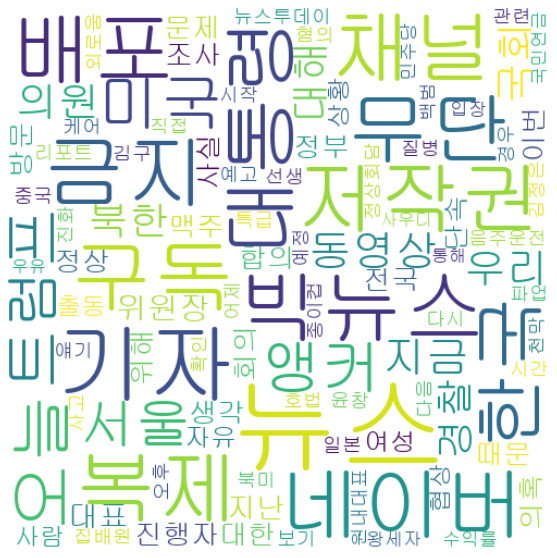

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(max_font_size=100, 
                      min_font_size = 5,
                      width=500, 
                      height=500, 
                      background_color='white', 
                      prefer_horizontal = 0.9999,
                      font_path="C:\Windows\Fonts\gulim.ttc").generate_from_frequencies(top_100)

fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# 문제 3

## Drug Review Dataset을 이용한 텍스트 분석

### 1) drugLibTrain_raw, drugLibTest_raw 파일 불러오기 
### 2) 피처 타입과 NULL 값 여부 확인
- urlDrugName: name of drug
- rating: 10 star patient rating
- effectiveness: 5 step effectiveness rating
- sideEffects: 5 step side effect rating
- condition: name of condition
- benefitsReview: patient on benefits
- sideEffectsReveiw: patient on side effects
- commentsReview: overall patient comment


In [ ]:
import pandas as pd

### 3) 각 칼럼의 분포나 형태 확인
 urlDrugName, rating, effectiveness, sideEffects 는 train 셋에 대해서만 확인 
 <br> commenntsReview, condition 는 train, test 셋 모두 확인
- DrugName 유형:
- rating 유형:
- effectiveness 유형:
- sideEffects 유형:
- condition train 유형:
- condition test 유형:
- commentsReview train의 평균 길이:
- commentsReview train 유형:
- commentsReview test 유형:

In [ ]:
# condition 칼럼은 train, test에 칼럼 개수가 각각 다르기 때문에 활용 X
# commentsReview 칼럼은 train, test 셋 모두에 결측치 존재

### 4) 결측값 처리
- train 데이터 셋에서 commentsReview 칼럼의 'none','None','.','See above','see above'도 결측값 처리
- test 데이터 셋에서 commentsReview 칼럼의 'none', 'see above'도 결측값 처리
- 모든 결측값은 'Other_Null' 문자열로 치환

### 5) 피처 인코딩 및 피처 벡터화
train, test 데이터 셋에게 모두 동일하게 적용
- effectiveness: 원-핫 인코딩
- sideEffects: 원-핫 인코딩
- commentsReview: TF-IDF 기반 피처 벡터화
- 조건: TfidfVectorizer(max_features=5000, ngram_range=(1,3), stop_words='english')
- 조건: LabelBinarizer를 이용해 희소행렬 형태로 반환
- 제대로 변환되었는지 확인까지

In [ ]:
# 피처 벡터화
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# 피처 인코딩
from sklearn.preprocessing import LabelBinarizer

In [ ]:
# 확인

### 6) 하나의 데이터 셋으로 결합
- train, test 셋 각각 따로 결합


In [ ]:
from scipy.sparse import hstack

# 문제 4

## Drug Review Dataset을 이용한 회귀 모델 구축

### 1) target 값인 ratings 칼럼 원-핫 인코딩
- pandas의 get_dummies () 활용
- train, test 셋에 각각 적용

In [ ]:
import pandas as pd

### 2) 회귀 모델을 평가 할 RMSLE 함수 생성
- log1p 사용

### 3) Ridge 회귀 모델 적용
- Ridge(solver='lsqr', fit_intercept=False)
- 별도의 함수 정의 없이 바로 적용
- 앞에서 생성한 피처의 희소행렬 결합과 원-핫 인코딩 된 타겟값 이용

In [ ]:
from sklearn.linear_model import Ridge

### 5) LightGBM 회귀 모델 적용
- LGBMRegressor(n_estimators=200, learning_rate=0.5, num_leaves=125, random_state=156)
- 별도의 함수 정의 없이 바로 적용
- 앞에서 생성한 피처의 희소행렬 결합과 타겟값 이용

In [ ]:
from lightgbm import LGBMRegressor